In [4]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 114kB/s 
     |████████████████████████████████| 3.8MB 47.3MB/s 
     |████████████████████████████████| 450kB 66.5MB/s 
     |████████████████████████████████| 81kB 13.1MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [37]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0'

In [0]:
lr = 0.01
steps = 1000
disp = 50

In [0]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [0]:
W = tf.Variable(np.random.random(), name='weights')
b = tf.Variable(np.random.random(), name='bias')

def linear(x):
    return W*x + b

def mean_sqr(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)

optimizer = tf.optimizers.SGD(lr)

In [41]:
print(W)

<tf.Variable 'weights:0' shape=() dtype=float32, numpy=0.79043794>


In [0]:
def run_optimization():

    with tf.GradientTape() as g:
        pred = linear(X)
        loss = mean_sqr(pred, Y)
    
    gradients = g.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))

In [43]:
for step in range(1, steps+1):

    run_optimization()
    
    if step % 10 == 0:
        pred = linear(X)
        loss = mean_sqr(pred, Y)
        print(step, 'Loss', loss.numpy(), 'Weights', W.numpy(), 'Bias', b.numpy())


10 Loss 0.10747461 Weights 0.35175687 Bias 0.09678187
20 Loss 0.10671539 Weights 0.3494851 Bias 0.10510684
30 Loss 0.10600055 Weights 0.3483012 Bias 0.11348089
40 Loss 0.10530287 Weights 0.34713423 Bias 0.12175422
50 Loss 0.10462194 Weights 0.34598133 Bias 0.12992766
60 Loss 0.10395733 Weights 0.34484237 Bias 0.13800244
70 Loss 0.103308685 Weights 0.34371716 Bias 0.14597973
80 Loss 0.10267562 Weights 0.3426055 Bias 0.15386073
90 Loss 0.10205771 Weights 0.34150732 Bias 0.16164657
100 Loss 0.10145465 Weights 0.34042236 Bias 0.16933845
110 Loss 0.100866064 Weights 0.3393505 Bias 0.17693746
120 Loss 0.10029162 Weights 0.33829156 Bias 0.18444471
130 Loss 0.09973093 Weights 0.33724543 Bias 0.19186136
140 Loss 0.09918372 Weights 0.33621192 Bias 0.19918846
150 Loss 0.09864963 Weights 0.33519092 Bias 0.2064271
160 Loss 0.09812836 Weights 0.3341822 Bias 0.21357833
170 Loss 0.09761959 Weights 0.33318567 Bias 0.22064325
180 Loss 0.09712306 Weights 0.33220118 Bias 0.22762291
190 Loss 0.09663841 Wei

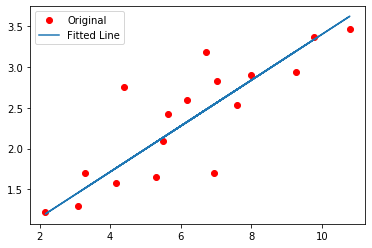

In [45]:
import matplotlib.pyplot as plt

plt.plot(X,Y, 'ro', label='Original')
plt.plot(X, np.array(W*X+b), label='Fitted Line')
plt.legend()
plt.show()